In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

## reading data

In [108]:
car_data = pd.read_csv('../data/raw/car_raw.csv', index_col=0)
print(car_data.shape)
car_data.head()

(2996, 11)


,product,price,link,years,kilometraje,_created,vehicle_make,vehicle_line,id,location_city,location_state
2646,Toyota Fortuner 2.7l Street,164000000,https://carro.mercadolibre.com.co/MCO-14036380...,2020,41000,2024-03-17,Toyota,Fortuner,1403638069,Usaquén,Bogotá D.C.
2647,Volkswagen Virtus Highline,65000000,https://carro.mercadolibre.com.co/MCO-22690232...,2020,53500,2024-03-17,Volkswagen,Virtus,2269023256,Usaquén,Bogotá D.C.
2648,Mercedes-benz C 180 Avantgrade,105000000,https://carro.mercadolibre.com.co/MCO-14035994...,2019,31000,2024-03-17,Mercedes-benz,C,1403599487,Usaquén,Bogotá D.C.
2649,Mercedes-benz Glc 300 4matic Amg Line,165000000,https://carro.mercadolibre.com.co/MCO-14036120...,2020,34000,2024-03-17,Mercedes-benz,Glc,1403612049,Chapinero,Bogotá D.C.
2650,Renault Sandero Expression,39000000,https://carro.mercadolibre.com.co/MCO-22690132...,2018,60000,2024-03-17,Renault,Sandero,2269013298,Usaquén,Bogotá D.C.


In [109]:
## Indentify wrong data an fix it
car_data['price'] = car_data['price'].replace(3320000000, 320000000)
car_data['price'] = car_data['price'].replace(730000000, 71000000)

## Marca del vehiculo

<Axes: xlabel='vehicle_make'>

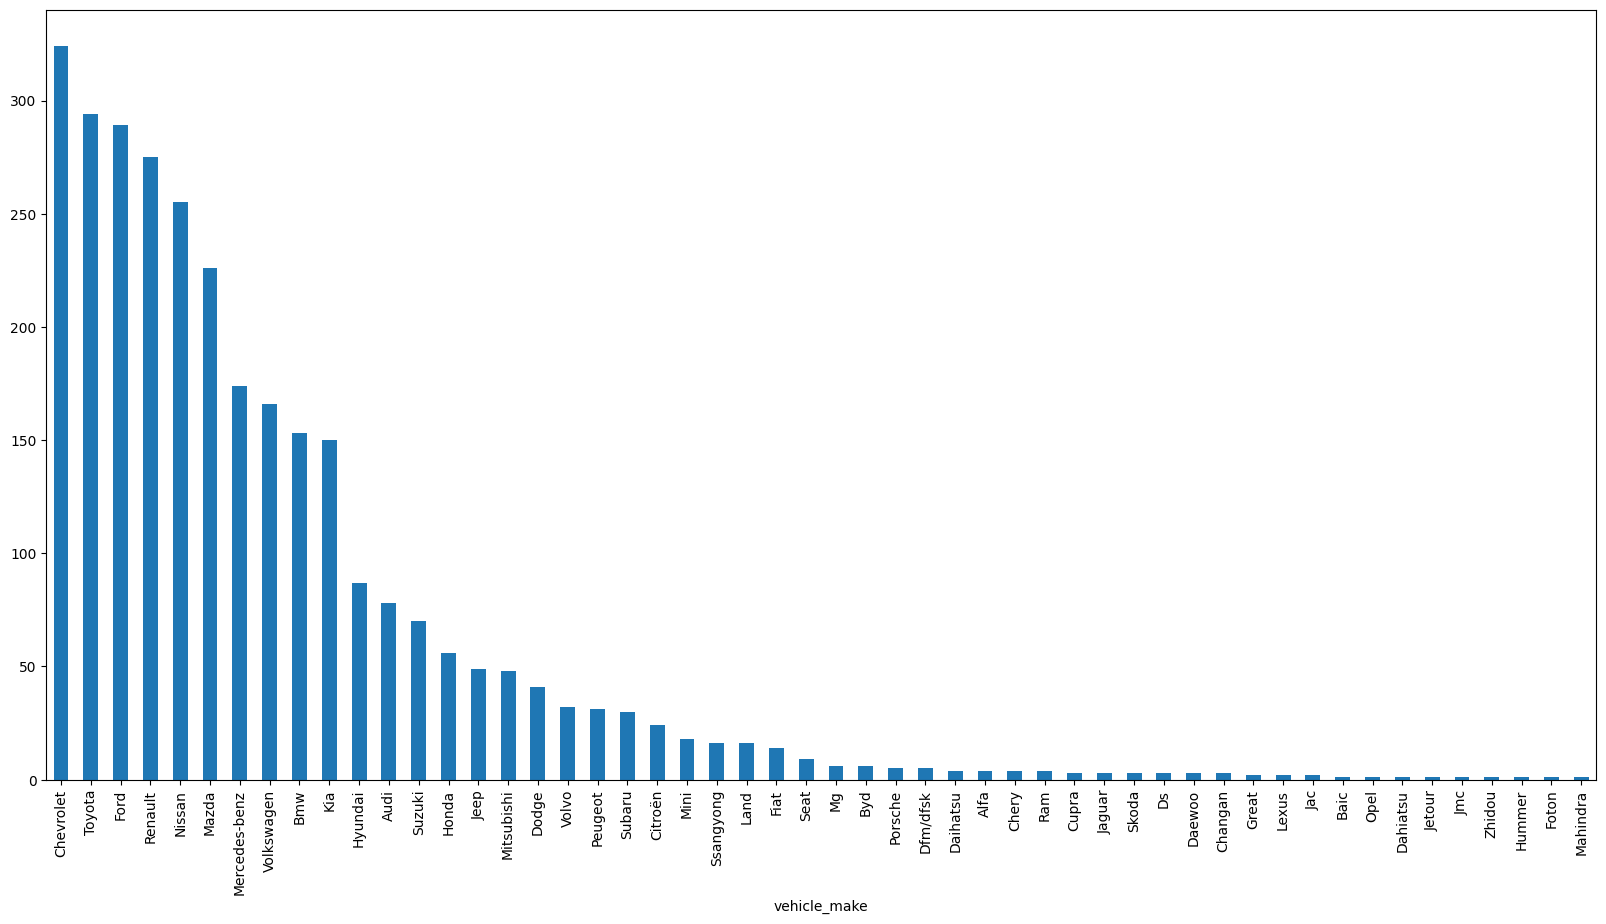

In [110]:
plt.figure(figsize=(20,10))
car_data['vehicle_make'].value_counts().plot(kind='bar')

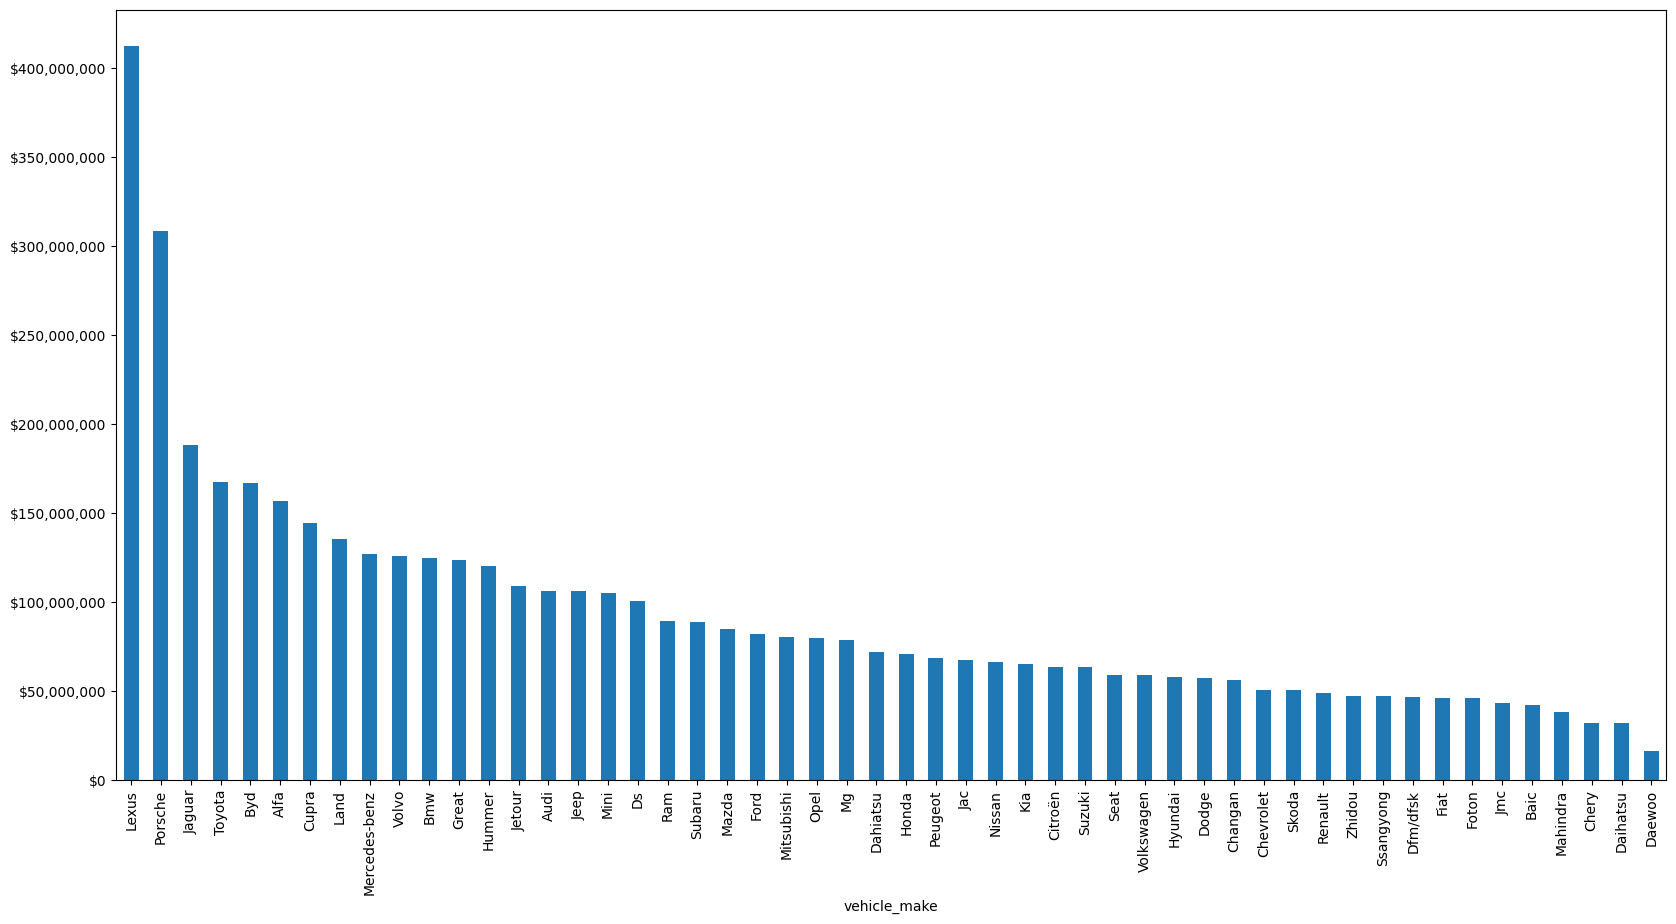

In [111]:


# Suponiendo que car_data es tu DataFrame y ya has agrupado y ordenado los datos como mencionaste
plt.figure(figsize=(20,10))
ax = car_data.groupby('vehicle_make')['price'].mean().sort_values(ascending=False).plot(kind='bar')

# Formatear el eje y para mostrar los valores en formato de dinero
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

plt.show()

## Modelo del vehiculo

<Axes: xlabel='years'>

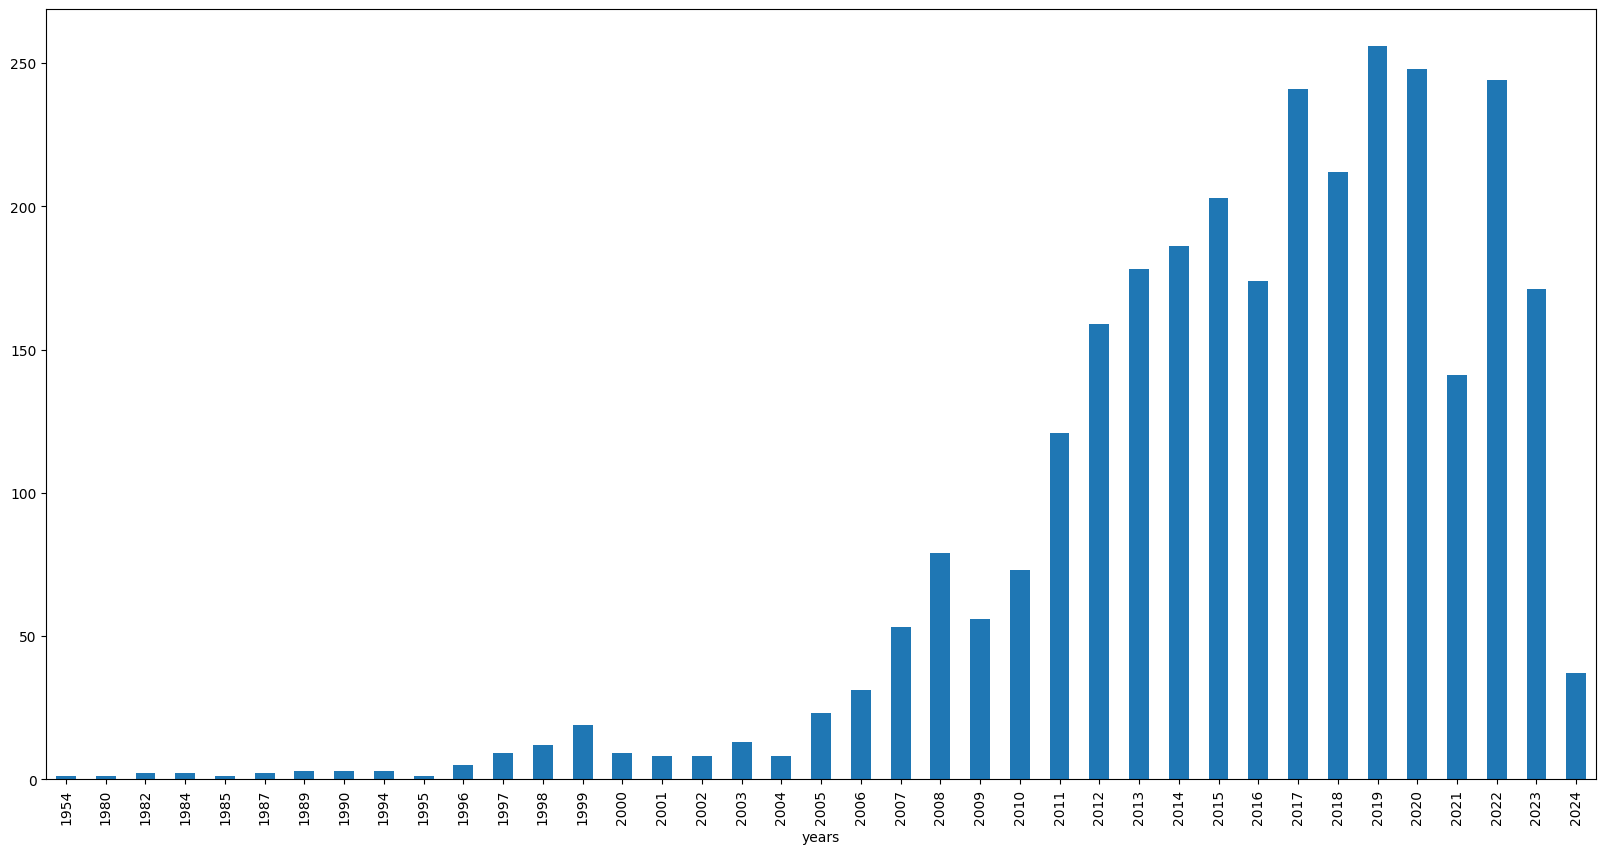

In [112]:
plt.figure(figsize=(20,10))
car_data['years'].value_counts().sort_index().plot(kind='bar')

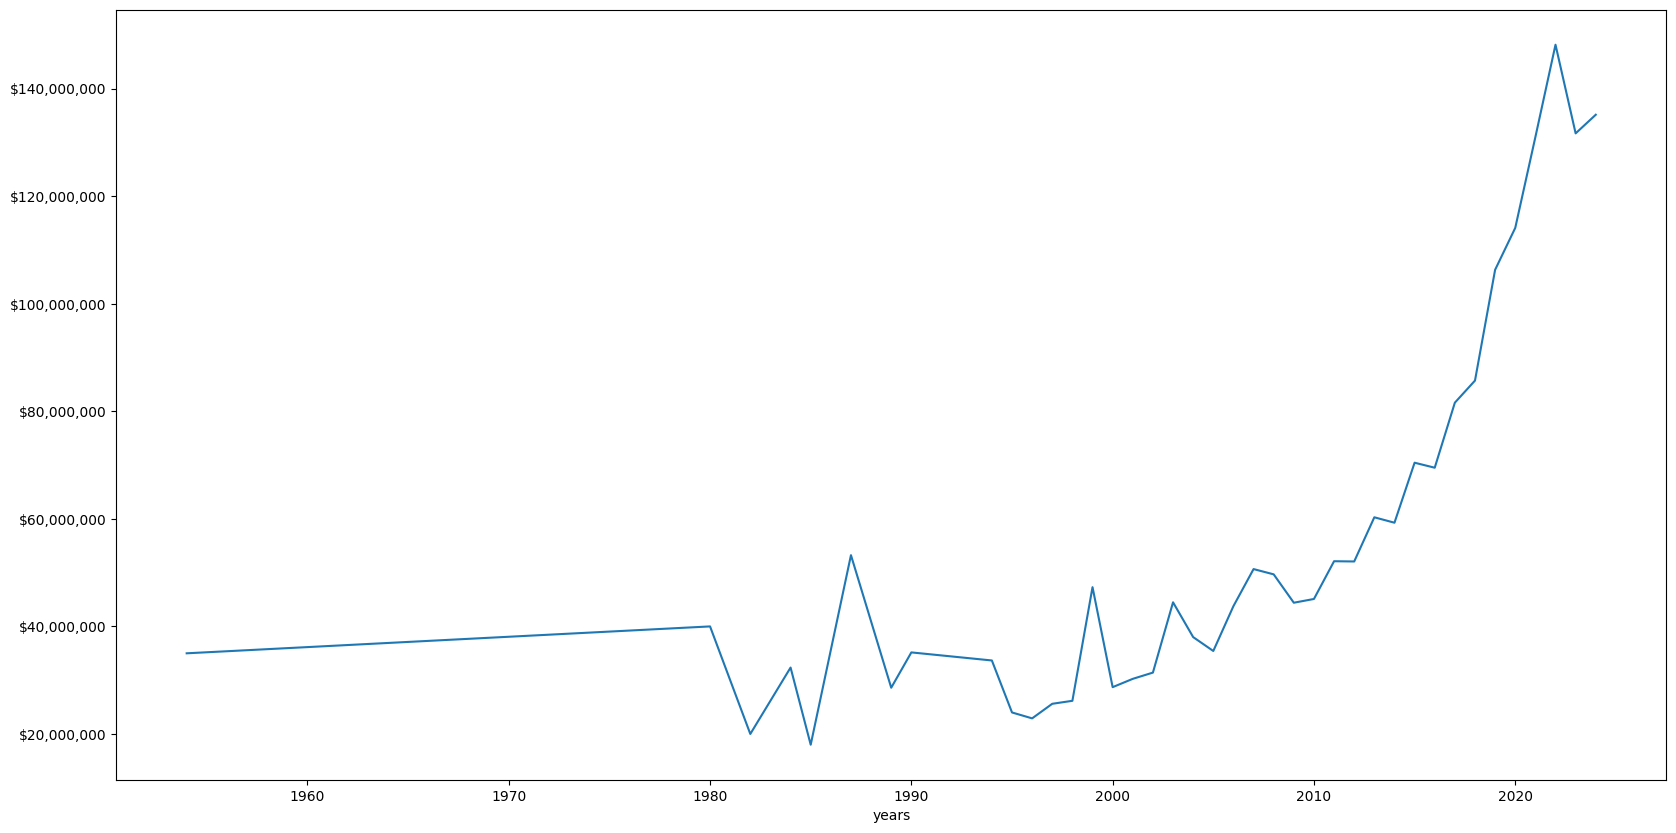

In [113]:
plt.figure(figsize=(20,10))
ax = car_data.groupby('years')['price'].mean().plot(kind='line')

# Formatear el eje y para mostrar los valores en formato de dinero
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

plt.show()

## Kilometraje

<Axes: >

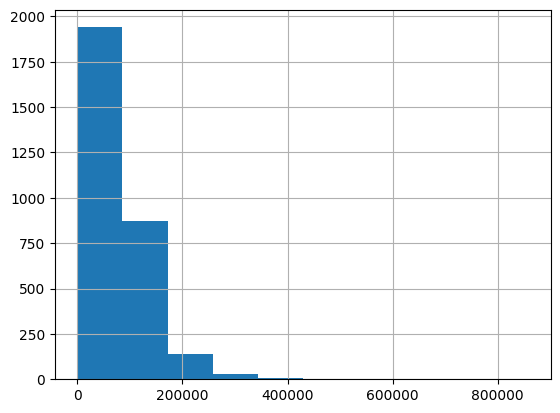

In [114]:
car_data['kilometraje'].hist()

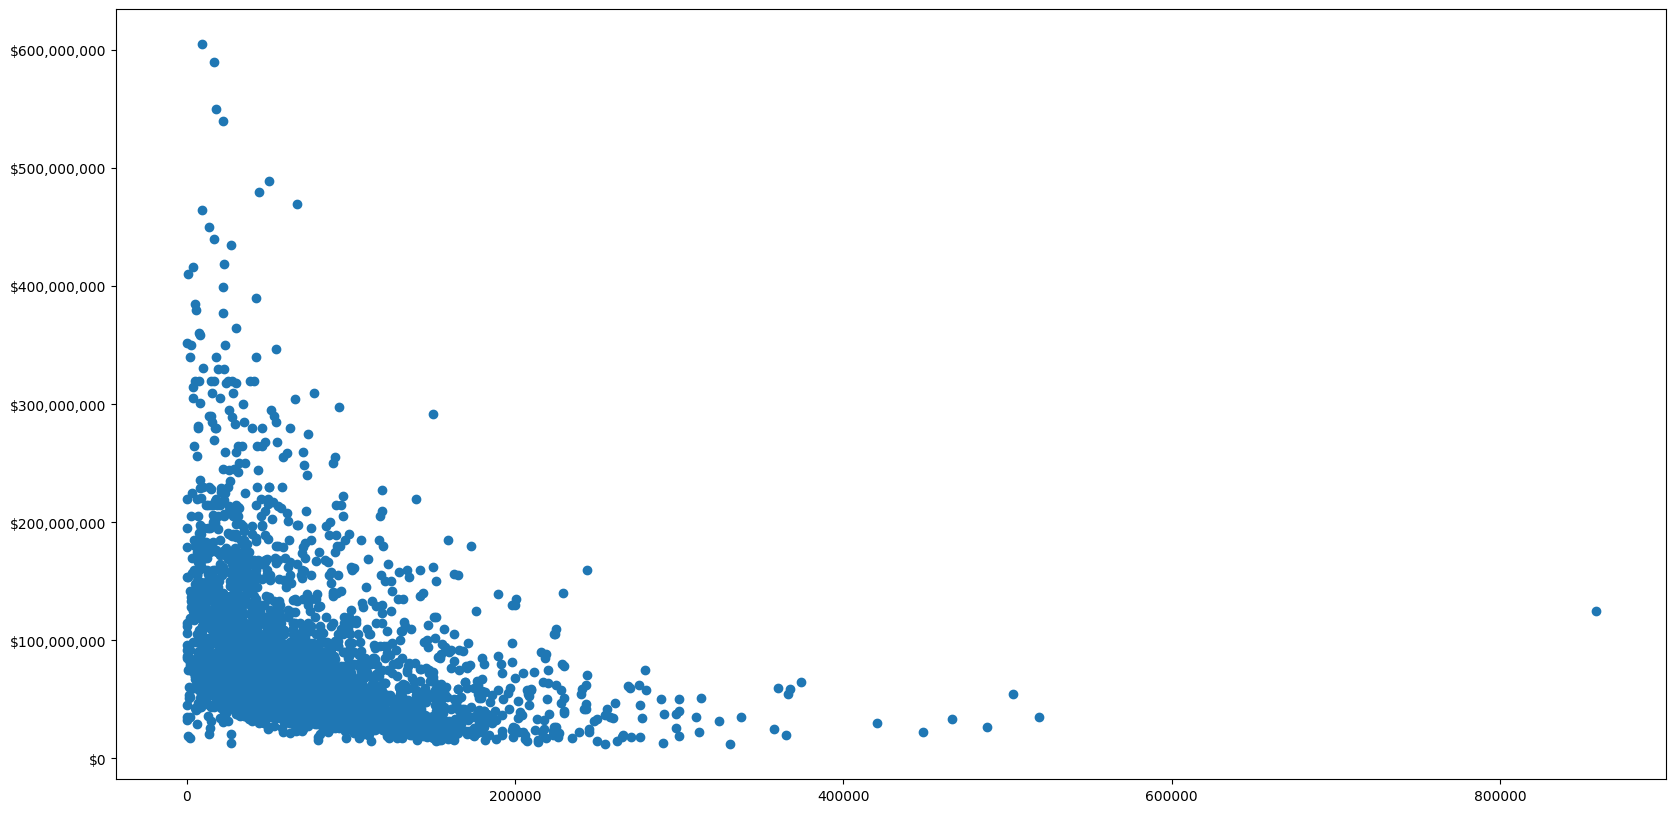

In [115]:
# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(20,10))

# Crear el gráfico de dispersión usando el objeto de ejes
ax.scatter(x=car_data['kilometraje'], y=car_data['price'])

# Definir el formato para el eje y
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)

# Aplicar el formato al eje y
ax.yaxis.set_major_formatter(tick)

# Mostrar el gráfico
plt.show()

# Explorar alguna marca en especifico

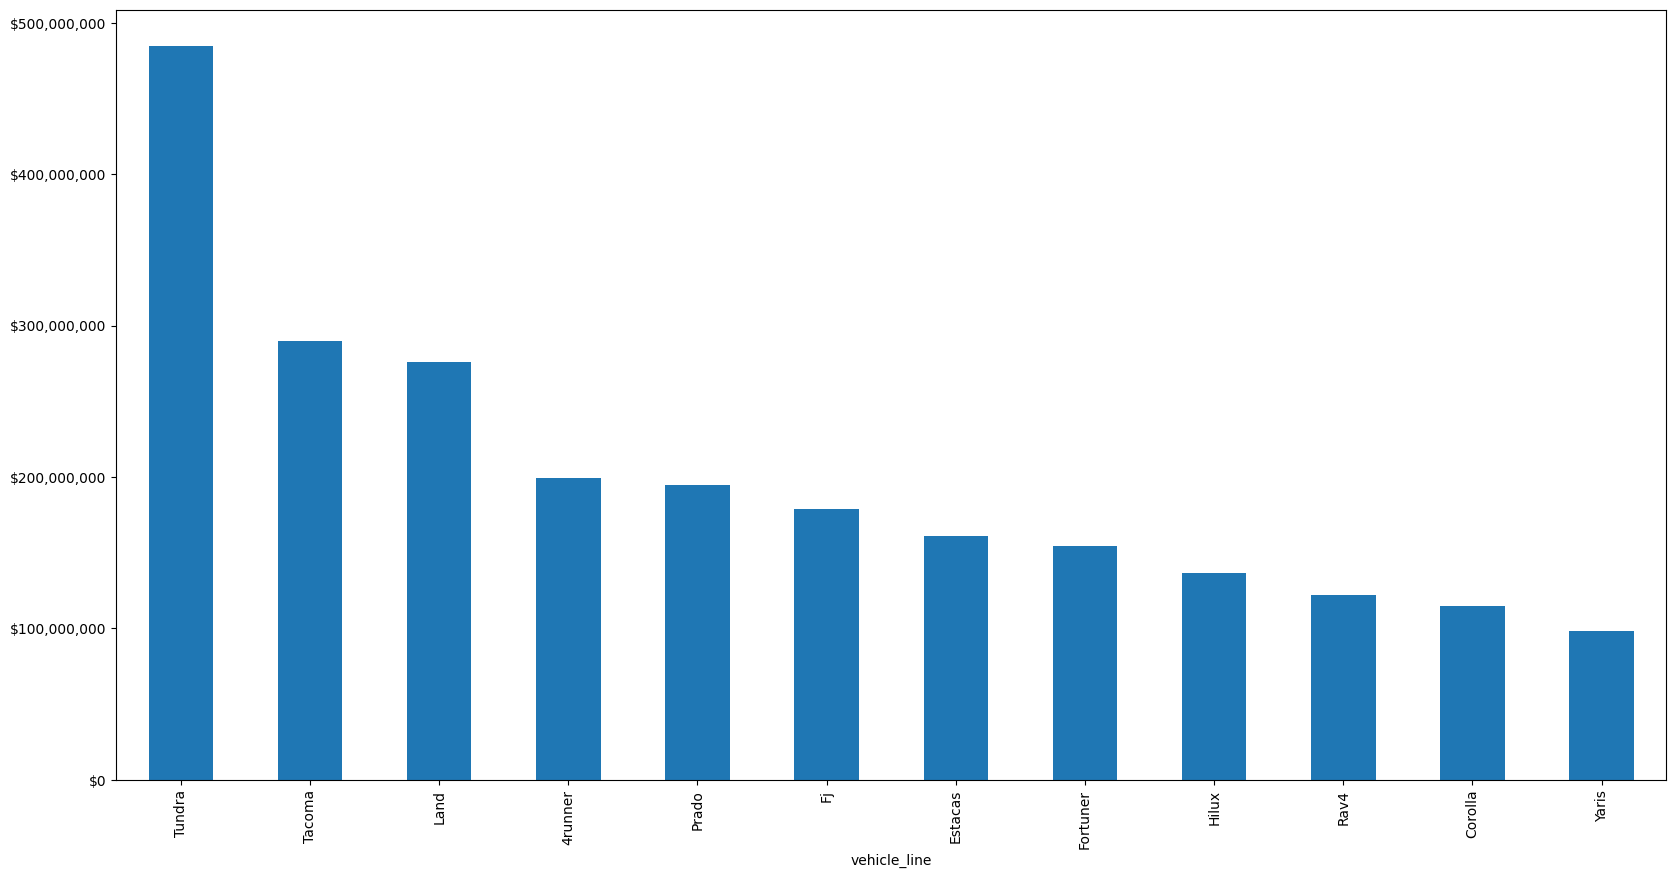

In [116]:
# Suponiendo que car_data es tu DataFrame y ya has agrupado y ordenado los datos como mencionaste
plt.figure(figsize=(20,10))
ax = car_data[car_data['vehicle_make']=='Toyota'].groupby('vehicle_line')['price'].mean().sort_values(ascending=False).plot(kind='bar')

# Formatear el eje y para mostrar los valores en formato de dinero
fmt = '${x:,.0f}'
tick = mtick.StrMethodFormatter(fmt)
ax.yaxis.set_major_formatter(tick)

plt.show()

## Creando antiguedad a partir de año

<Axes: >

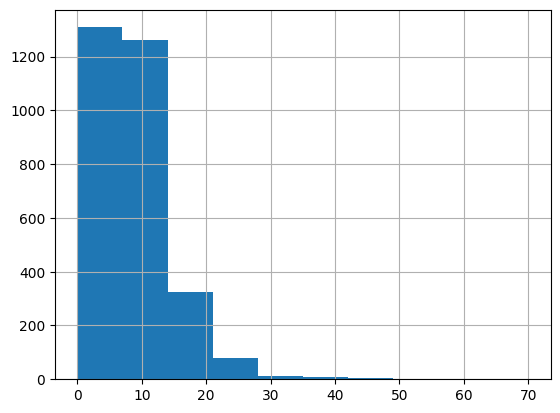

In [117]:
car_data['year_created' ] = car_data['_created'].apply(lambda x: x[:4]).astype(int)
car_data['antique'] = car_data['year_created'] - car_data['years']
car_data['antique'].hist()

# Select only usefull vars for modeling

In [118]:
final_vars = ['price', 'antique', 'vehicle_make', 'vehicle_line', 'kilometraje', 'location_city', 'location_state']
car_data = car_data[final_vars]

In [119]:
car_data

,price,antique,vehicle_make,vehicle_line,kilometraje,location_city,location_state
2646,164000000,4,Toyota,Fortuner,41000,Usaquén,Bogotá D.C.
2647,65000000,4,Volkswagen,Virtus,53500,Usaquén,Bogotá D.C.
2648,105000000,5,Mercedes-benz,C,31000,Usaquén,Bogotá D.C.
2649,165000000,4,Mercedes-benz,Glc,34000,Chapinero,Bogotá D.C.
2650,39000000,6,Renault,Sandero,60000,Usaquén,Bogotá D.C.
...,...,...,...,...,...,...,...
6117,59500000,3,Chevrolet,Onix,24000,Santa Fe,Bogotá D.C.
6118,65000000,6,Mazda,2,56000,Usaquén,Bogotá D.C.
6119,102000000,4,Mercedes-benz,A,45000,Usaquén,Bogotá D.C.
6120,63000000,5,Suzuki,Grand,105400,Usaquén,Bogotá D.C.


In [120]:
## Vars with na
vars_with_na = [var for var in car_data.columns if car_data[var].isnull().sum() > 0]

car_data[vars_with_na].isnull().mean()

Series([], dtype: float64)

In [121]:
# make list of numerical variables
num_vars = [var for var in car_data.columns if car_data[var].dtypes != 'O' and 'fraude' not in var]

print('Number of numerical variables: ', len(num_vars))

# visualise the numerical variables
car_data[num_vars].head()

Number of numerical variables:  3


,price,antique,kilometraje
2646,164000000,4,41000
2647,65000000,4,53500
2648,105000000,5,31000
2649,165000000,4,34000
2650,39000000,6,60000


In [122]:
#  let's male a list of discrete variables
discrete_vars = [var for var in num_vars if len(
    car_data[var].unique()) < 20]


print('Number of discrete variables: ', len(discrete_vars))

Number of discrete variables:  0


In [123]:
# capture categorical variables in a list
cat_vars = [var for var in car_data.columns if car_data[var].dtypes == 'O' and 'fecha' not in var]

print('Number of categorical variables: ', len(cat_vars))

Number of categorical variables:  4


In [124]:
def analyse_rare_labels(df, var, rare_perc):
    df = df.copy()

    # determine the % of observations per category
    tmp = df.groupby(var)['price'].count() / len(df)


    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than
# 1 % of the observations


for var in cat_vars:
    print(analyse_rare_labels(car_data, var, 0.01))
    print()

vehicle_make
Alfa         0.001335
Baic         0.000334
Byd          0.002003
Changan      0.001001
Chery        0.001335
Citroën      0.008011
Cupra        0.001001
Daewoo       0.001001
Dahiatsu     0.000334
Daihatsu     0.001335
Dfm/dfsk     0.001669
Ds           0.001001
Fiat         0.004673
Foton        0.000334
Great        0.000668
Hummer       0.000334
Jac          0.000668
Jaguar       0.001001
Jetour       0.000334
Jmc          0.000334
Land         0.005340
Lexus        0.000668
Mahindra     0.000334
Mg           0.002003
Mini         0.006008
Opel         0.000334
Porsche      0.001669
Ram          0.001335
Seat         0.003004
Skoda        0.001001
Ssangyong    0.005340
Zhidou       0.000334
Name: price, dtype: float64

vehicle_line
116       0.000334
120i      0.000334
128ti     0.000334
2008      0.001669
206       0.002003
            ...   
Yeti      0.000334
Yoya      0.000668
Yuan      0.000668
Zafira    0.000668
Zs        0.000668
Name: price, Length: 324, dtype: